# **Assignment 3 : Node2Vec**

### Setup

First of all, we install the [node2vec library](https://github.com/eliorc/node2vec) which offers a fast implementation of the node2vec method.

If you are curious to learn how to implement fast random walks on graphs, I recommend you to [read the blog post](https://www.singlelunch.com/2019/08/01/700x-faster-node2vec-models-fastest-random-walks-on-a-graph/) which explains some of the design choices behind this library.

In [1]:
!pip install node2vec 

We now import the library, and create a small wrapper class which will expose only the few hyperparameters we will need to tune in this Colab

In [94]:
# from nodevectors.embedders import Node2Vec
from node2vec import Node2Vec
import networkx as nx

class Node2Vec(Node2Vec):
  """
  Parameters
  ----------
  p : float
      p parameter of node2vec
  q : float
      q parameter of node2vec
  d : int
      dimensionality of the embedding vectors
  """
  def __init__(self, graph, p=1, q=1, d=32):
    super().__init__(
                     graph = graph,
                     walk_length=10,
                     p=p,
                     q=q,
                     dimensions =d
                  )

Lastly, let's import some of the common libraries needed for our task.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Example

In the example below, we will use Zachary's Karate Club to demonstrate the power of node2vec. 

In [10]:
# Load the Zachary's Karate Club as a NetworkX Graph object
KCG = nx.karate_club_graph()

# Fit embedding model to the Karate Club graph
n2v_model = Node2Vec(KCG ,1, 1, 2)

# Embed nodes
model = n2v_model.fit(window=10, min_count=1, batch_words=4)

# Node to vec representation
w2v =  model.wv.vectors

Computing transition probabilities:   0%|          | 0/34 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████████| 10/10 [00:00<00:00, 1208.91it/s]


In [11]:
embeddings = []
for id in range(len(KCG.nodes)):
  embedding = w2v[id:id+1][0]
  club = KCG.nodes[id]['club']
  embeddings.append([embedding[0:1][0],embedding[1:2][0] ,club])

# # Construct a pandas dataframe with the 2D embeddings from node2vec,
# # # plus the club name that each node belongs to after the split
df = pd.DataFrame(embeddings, columns=['x', 'y', 'club'])

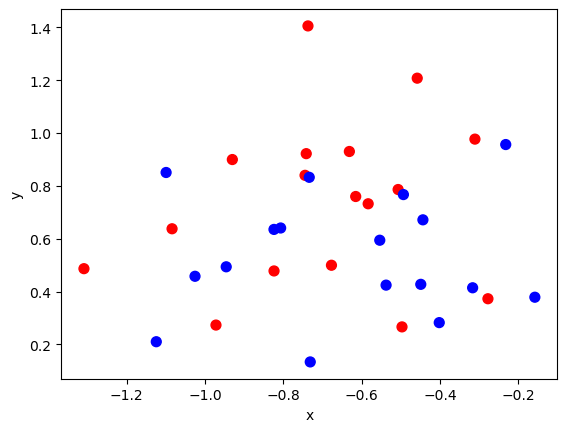

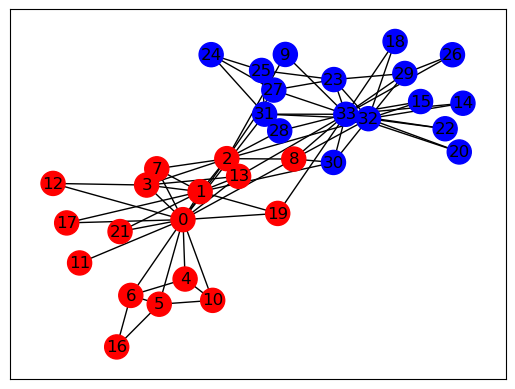

In [12]:
# Nodes who stayed with the Mr. Hi will be plotted in red, while nodes
# who moved with the Officer will be plotted in blue
colors = ['red' if x == 'Mr. Hi' else 'blue' for x in df.club]
df.plot.scatter(x='x', y='y', s=50, c=colors)
plt.show()

nx.draw_networkx(KCG, with_labels=True, node_color=colors)
plt.show()

If our example trained correctly, you should notice a clear separation between the blue and red nodes.  Solely from the graph structure, node2vec could predict how the Zachary's Karate Club split!

Tune the hyperparameters ```p``` and ```q```, and notice how they affect the resulting embeddings.

### Your Tasks

Now we will study the behavior of node2vec on [barbell graphs](https://en.wikipedia.org/wiki/Barbell_graph).

Below you can see a toy example of a barbell graph generated with NetworkX ( [nx.barbell_graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.barbell_graph.html#networkx.generators.classic.barbell_graph) ).

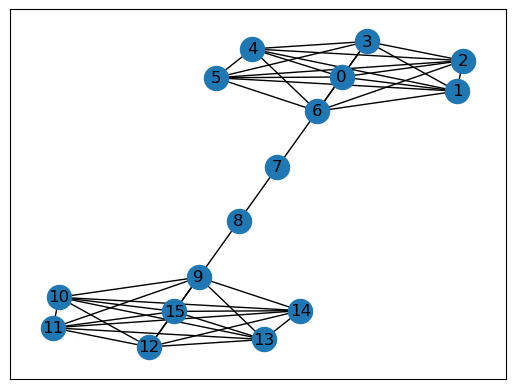

In [15]:
toy_barbell = nx.barbell_graph(7, 2)
pos = nx.kamada_kawai_layout(toy_barbell)
nx.draw_networkx(toy_barbell, pos=pos)

**Question 1:**

Above is a barbell graph with a 2 node path inbetween two complete graphs. 

Generate a larger barbell graph, where each complete graph has exactly 100 nodes, and there are no nodes in the path inbetween them (i.e., all the nodes in the barbell graph belong to either one of the two complete graphs, and the connecting path does not have any internal node).

Then, learn node2vec embeddings on this graph, setting ```p = 1, q = 1``` and ```d = 10```.

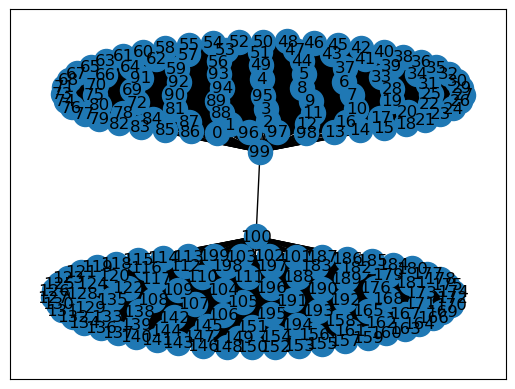

In [96]:
barbell_0 = nx.barbell_graph(100, 0)
pos = nx.kamada_kawai_layout(barbell_0)
nx.draw_networkx(barbell_0, pos=pos)

Computing transition probabilities:   0%|          | 0/200 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|███████████████| 10/10 [00:00<00:00, 100.03it/s]


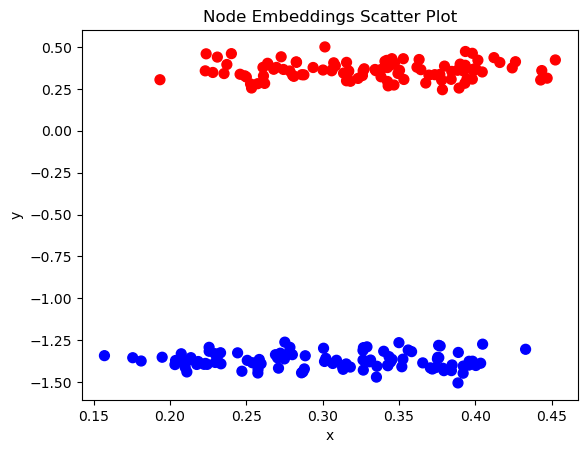

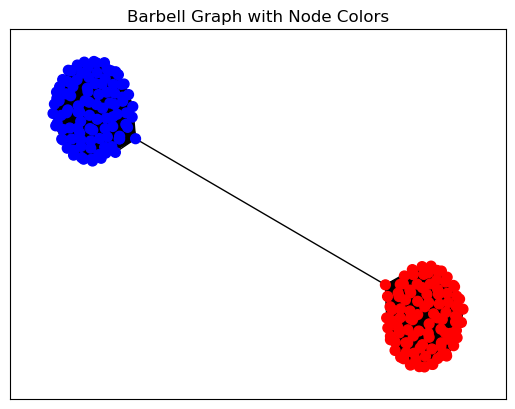

In [107]:
# Initialize Node2Vec model
n2v_model = Node2Vec(barbell_0,1, 1, 10)

# Train model
model_0 = n2v_model.fit(window=10, min_count=1, batch_words=4)

embeddings = []
for node in barbell_0.nodes():
    embedding = model_0.wv[str(node)]
    club = 'FirstHalf' if node < 100 else 'SecondHalf' 
    embeddings.append([embedding[0], embedding[1], club])

df = pd.DataFrame(embeddings, columns=['x', 'y', 'club'])

# Plotting
colors = ['red' if x == 'FirstHalf' else 'blue' for x in df['club']]

df.plot.scatter(x='x', y='y', s=50, c=colors)
plt.title('Node Embeddings Scatter Plot')
plt.show()

nx.draw_networkx(barbell_0, pos=nx.spring_layout(barbell_0), with_labels=False, node_color=colors, node_size=50)
plt.title('Barbell Graph with Node Colors')
plt.show()


**Question 2:**

Generate another barbell graph, this time adding a path of 10 nodes between the two complete graphs.

Learn the node2vec embeddings for the nodes of this new graph, using the same hyperparameters as before.

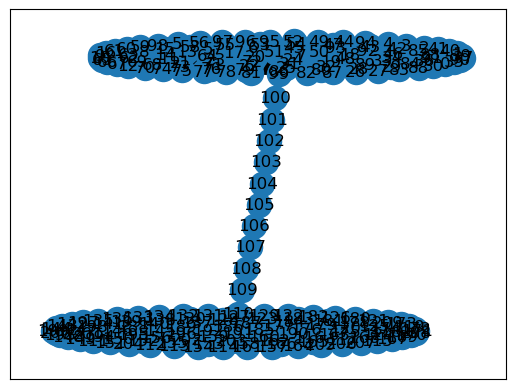

In [100]:
barbell_10 = nx.barbell_graph(100, 10)
pos = nx.kamada_kawai_layout(barbell_10)
nx.draw_networkx(barbell_10, pos=pos)

Computing transition probabilities:   0%|          | 0/210 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|████████████████| 10/10 [00:00<00:00, 54.31it/s]


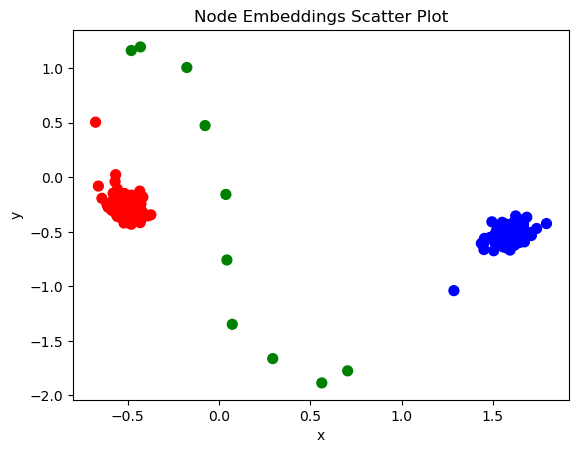

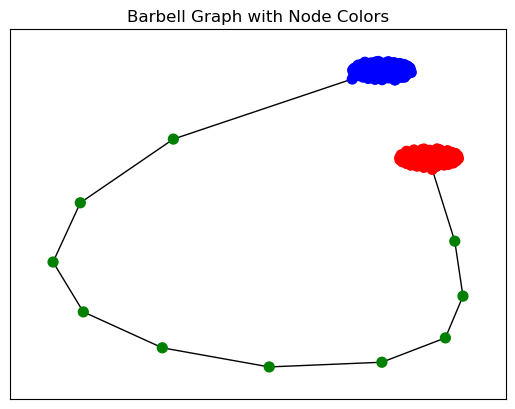

In [103]:
# Initialize Node2Vec model
n2v_model = Node2Vec(barbell_10,1, 1, 10)

# Train model
model_10 = n2v_model.fit(window=10, min_count=1, batch_words=4)

embeddings = []
for node in barbell_10.nodes():
    embedding = model_10.wv[str(node)] 
    
    if node < 100:
        club = 'FirstHalf'
    elif node < 110:  # Nodes connecting the two halves
        club = 'Path'
    else:
        club = 'SecondHalf'
    embeddings.append([embedding[0], embedding[1], club])

df = pd.DataFrame(embeddings, columns=['x', 'y', 'club'])

# Plotting
colors = ['red' if club == 'FirstHalf' else 'green' if club == 'Path' else 'blue' for club in df['club']]

df.plot.scatter(x='x', y='y', s=50, c=colors)
plt.title('Node Embeddings Scatter Plot')
plt.show()

nx.draw_networkx(barbell_10, pos=nx.spring_layout(barbell_10), with_labels=False, node_color=colors, node_size=50)
plt.title('Barbell Graph with Node Colors')
plt.show()


**Question 3:**
Now write a function that takes as input a node id ```n``` in the graph (e.g., ```5```) and returns a list containing the cosine similarity between the node2vec vector obtained from `model.wv.vectors` of the input node ```n``` and all the nodes in the given barbell graph (including the similarity with ```n``` itself).

In [108]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def node_similarity(n, model):

    n_vector = model.wv[str(n)].reshape(1, -1)  # Reshape for compatibility with cosine_similarity
    
    all_vectors = np.array([model.wv[str(node)] for node in range(len(model.wv.index_to_key))])
    
    # Calculate cosine similarity
    similarities = cosine_similarity(n_vector, all_vectors)[0]  # Get similarities as a 1D array
    
    return similarities.tolist()

n = 5
similarities = node_similarity(n, model_0)

# Printing the first 101 similarities for brevity
print(similarities[:101])


[0.9949294328689575, 0.9955982565879822, 0.9938142895698547, 0.9851264357566833, 0.9928191900253296, 1.0000001192092896, 0.9943733811378479, 0.9897597432136536, 0.9916626214981079, 0.9963971972465515, 0.9960147738456726, 0.9925956726074219, 0.9912762641906738, 0.9925510883331299, 0.9923813343048096, 0.9934166669845581, 0.9932331442832947, 0.9937165975570679, 0.9869455099105835, 0.9940112233161926, 0.9910972714424133, 0.9964509606361389, 0.9969029426574707, 0.9953798055648804, 0.9954290986061096, 0.9899561405181885, 0.9876183271408081, 0.9933266639709473, 0.9974191188812256, 0.9840095043182373, 0.9905912280082703, 0.9950889348983765, 0.9925534129142761, 0.988756000995636, 0.9856014251708984, 0.994213342666626, 0.9908103346824646, 0.9947363138198853, 0.9959684610366821, 0.9937107563018799, 0.9917051196098328, 0.9893662929534912, 0.994127094745636, 0.9904899001121521, 0.9873578548431396, 0.9929211735725403, 0.9955134391784668, 0.9916295409202576, 0.9953513741493225, 0.9882827401161194, 0.

**Question 4:**

For each of the graphs you generated earlier (0 Node Path, 10 Node Path), count the number of neighbors for each node in the network and draw the node neighbors distribution. (Two nodes are defined as neighbors if their cosine similarity is greater than 0.7).

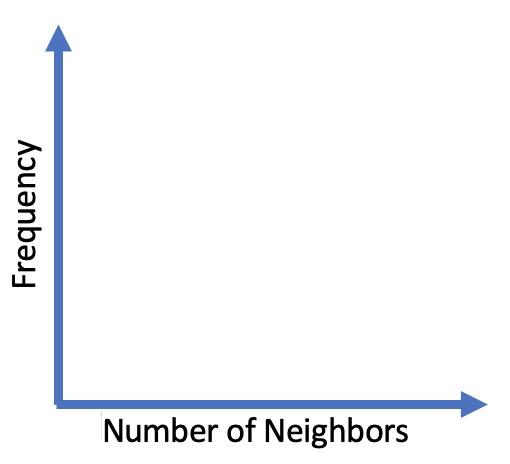



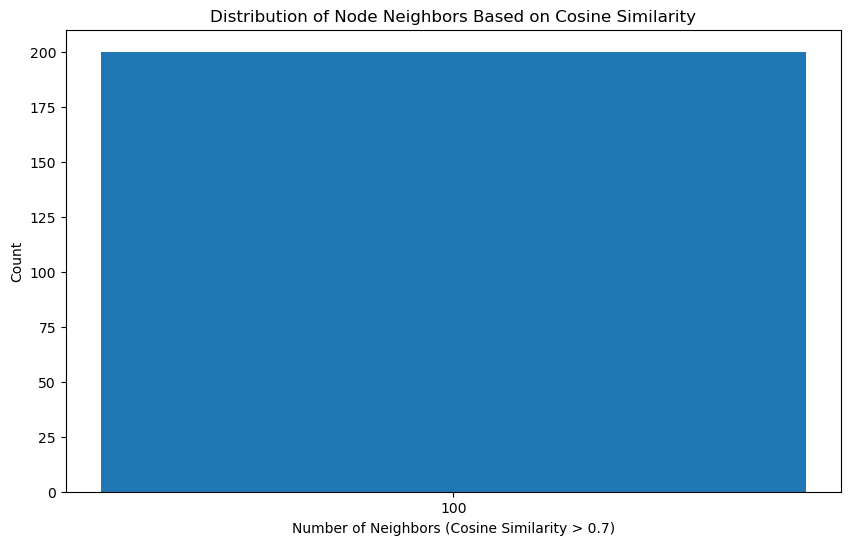

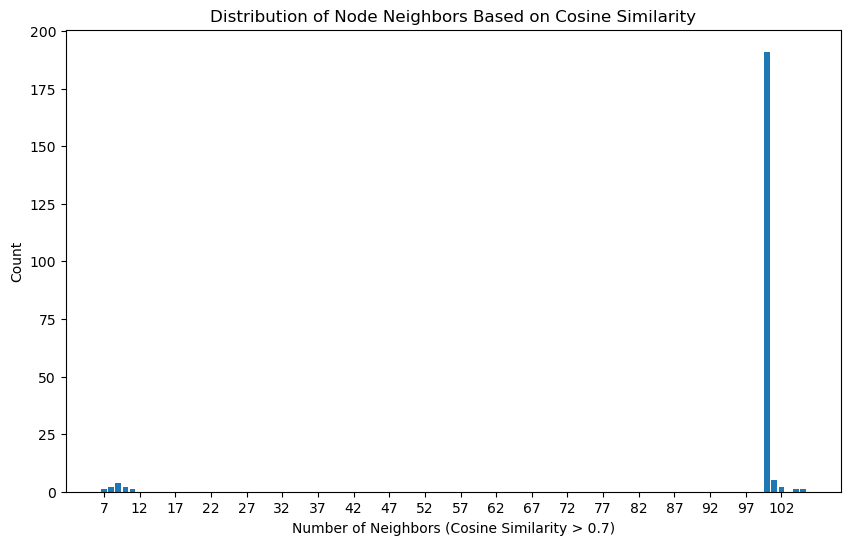

In [109]:
import matplotlib.pyplot as plt
from collections import Counter


def count_neighbors_threshold(graph, model, threshold=0.7):

    neighbor_counts = []
    for node in graph.nodes():
        # Calculate cosine similarity for the node against all others
        similarities = node_similarity(node, model)
        # Count neighbors based on the threshold
        neighbor_count = sum(sim > threshold for sim in similarities)
        neighbor_counts.append(neighbor_count)
    return neighbor_counts

def plot_neighbor_distribution(neighbor_counts, title):
    
    plt.figure(figsize=(10, 6))
    counter = Counter(neighbor_counts)
    plt.bar(counter.keys(), counter.values())
    plt.xlabel('Number of Neighbors (Cosine Similarity > 0.7)')
    plt.ylabel('Count')
    plt.xticks(range(min(neighbor_counts), max(neighbor_counts) + 1, 5))

    plt.title('Distribution of Node Neighbors Based on Cosine Similarity')
    plt.show()


# For the 0-node path barbell graph
neighbor_counts_0_path = count_neighbors_threshold(barbell_0, model_0)
plot_neighbor_distribution(neighbor_counts_0_path, 'Neighbor Distribution for 0-node Path Barbell Graph')

# For the 10-node path barbell graph
neighbor_counts_10_path = count_neighbors_threshold(barbell_10, model_10)
plot_neighbor_distribution(neighbor_counts_10_path, 'Neighbor Distribution for 10-node Path Barbell Graph')


**Question 5:**
How do you explain the behavior of the two data distributions in comparison to each other?


ANSWER= 

For 0 Nodes in the Path:
For the scenario with 0 nodes in the path, all the nodes are considered to have 100 neighbors, despite there being no nodes in the path.

For 10 Nodes in the Path:
For the scenario with 10 nodes in the path, the number of neighbors varies for each node. Specifically, nodes within the path have fewer than 10 neighbors, while nodes in fully connected sections have more than 100 neighbors.